In [1]:
# -*- coding: utf-8 -*-
"""
Created on Sun Apr  4 22:33:51 2021

@author: pmarc
Résolution Problème L08 - #2 par Pierre-Marc Juneau, 8 avril 2021

"""

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import statsmodels.api as stm


In [2]:

donnee = pd.read_csv('../Fichiers/DonneesMarketingv0r2.csv')
stats=donnee.describe()
dimensions=donnee.shape
nomsvariables = pd.DataFrame(donnee.columns)


Text(0.5, 0, 'Revenus')

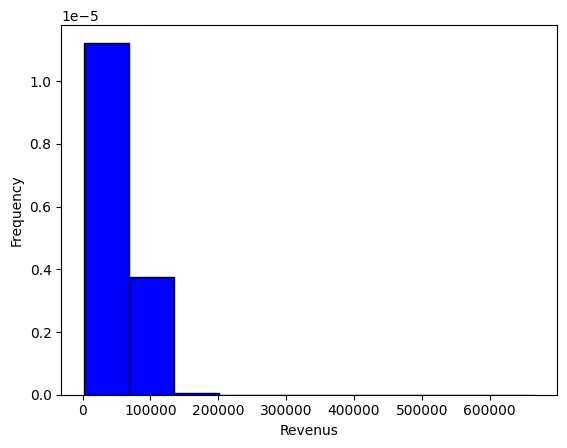

In [5]:


ax=donnee["Revenus"].plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Revenus")


Text(0.5, 0, 'Revenus')

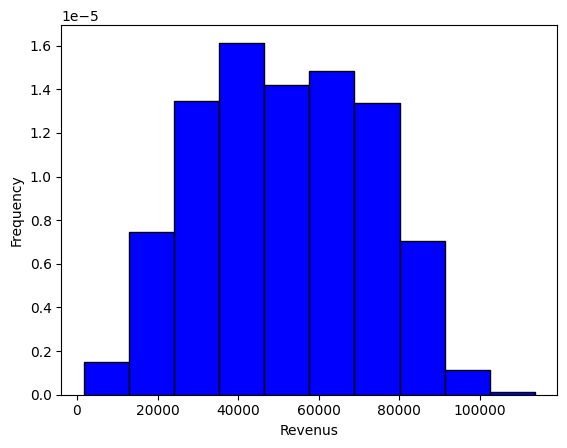

In [6]:

"Indice de qualité (complétude)"
NR=dimensions[0]
Nnan=donnee.isnull().sum()
DegCompletude=(NR-Nnan)/NR

"Pré-traitement"

Variable=donnee["Revenus"]
Variable=Variable.dropna()
Q1 = Variable.quantile(0.25)
Q3 = Variable.quantile(0.75)
IQR = Q3 - Q1
Variable = Variable[(Variable > (Q1 - 1.5 * IQR)) & (Variable < (Q3 + 1.5 * IQR))]

"Nouvel histogramme (distribution)"

ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Revenus")


((array([-3.41933142, -3.17012157, -3.03199912, ...,  3.03199912,
          3.17012157,  3.41933142]),
  array([  1730.,   2447.,   3502., ..., 102692., 105471., 113734.])),
 (20580.48087247355, 51633.63813405797, 0.9924354168342873))

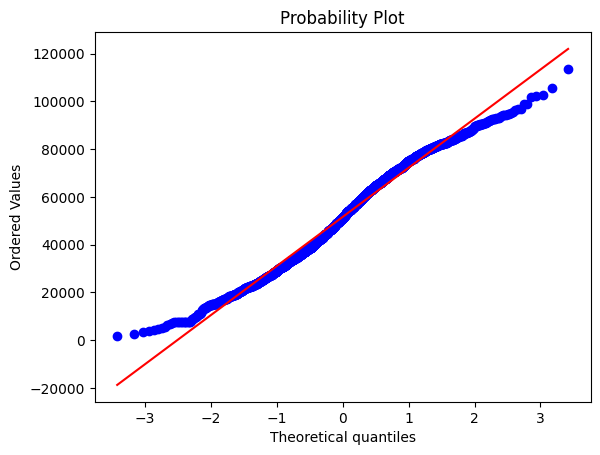

In [7]:

"Vérifier si la distribution est normale"

sts.probplot(Variable.values, dist=sts.norm, plot=plt.figure().add_subplot(111))


Text(0, 0.5, 'Fonction de densité f(x)')

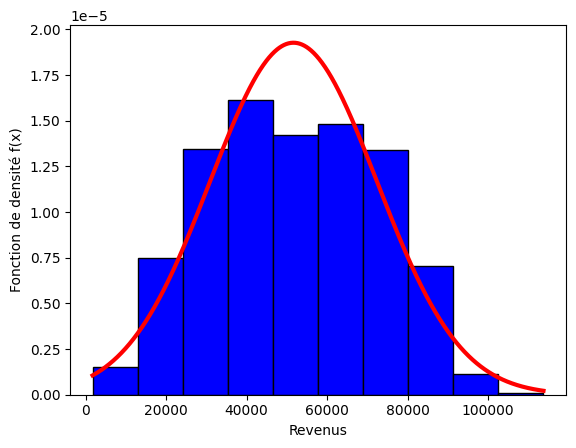

In [8]:


"Superposer la distribution normale estimée sur la vraie distribution"

d=1000
grille_x = np.linspace(Variable.min(), Variable.max(), d)
dx=(Variable.max()-(Variable.min()))/(d-1)
mu, sigma = sts.norm.fit(Variable.values)
pdf = sts.norm.pdf(grille_x, mu, sigma)
ax=Variable.plot.hist(density=True, bins = 10, color = 'blue', edgecolor = 'black')
ax.set_xlabel("Revenus")
ax.plot(grille_x, pdf, linewidth=3, color = 'red')
ax.set_ylabel("Fonction de densité f(x)")






